In [1]:
# Import the dependencies
import pandas as pd
import numpy as np
import datetime

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# ORM Stuff
from sqlalchemy import create_engine, inspect, text, func
from sqlalchemy.orm import Session
from sqlalchemy.ext.automap import automap_base

In [2]:
# CONNECT TO POSTGRES
USERNAME = "postgres"
PASSWORD = "password"
HOST = "localhost"
PORT = 5432
DATABASE = "crowdfunding_db"
connection_str = f"postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DATABASE}"

# Create Engine
engine = create_engine(connection_str)

In [7]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within the 'dow' table and its types
for table in tables:
    print(table)
    print("--------")
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])

    print()

contacts
--------
contact_id INTEGER
first_name VARCHAR(25)
last_name VARCHAR(25)
email VARCHAR(50)
last_updated TIMESTAMP

campaign
--------
cf_id INTEGER
contact_id INTEGER
company_name VARCHAR(50)
description VARCHAR(100)
goal NUMERIC(10, 2)
pledged NUMERIC(10, 2)
outcome VARCHAR(20)
backers_count INTEGER
country VARCHAR(2)
currency VARCHAR(3)
launched_date TIMESTAMP
end_date TIMESTAMP
category_id VARCHAR(10)
subcategory_id VARCHAR(10)
last_updated TIMESTAMP

category
--------
category_id VARCHAR(10)
category VARCHAR(20)
last_updated TIMESTAMP

subcategory
--------
subcategory_id VARCHAR(10)
subcategory VARCHAR(20)
last_updated TIMESTAMP



In [9]:
contacts_df = pd.read_csv("Resources/contacts.csv")

# Write to SQL (USING con=engine)
contacts_df.to_sql(name="contacts", con=engine, index=False, if_exists="append", method="multi")

1000

In [11]:
contacts_df

,contact_id,first_name,last_name,email
0,4661,Cecilia,Velasco,cecilia.velasco@rodrigues.fr
1,3765,Mariana,Ellis,mariana.ellis@rossi.org
2,4187,Sofie,Woods,sofie.woods@riviere.com
3,4941,Jeanette,Iannotti,jeanette.iannotti@yahoo.com
4,2199,Samuel,Sorgatz,samuel.sorgatz@gmail.com
...,...,...,...,...
995,3684,Whitney,Noack,whitney.noack@laboratorios.org
996,5784,Gelsomina,Migliaccio,gelsomina.migliaccio@junk.com
997,1498,Evangelista,Pereira,evangelista.pereira@thompson-peterson.biz
998,6073,Gareth,Comolli,gareth.comolli@tiscali.fr


In [13]:
category_df = pd.read_csv("Resources/category.csv")

# Write to SQL (USING con=engine)
category_df.to_sql(name="category", con=engine, index=False, if_exists="append", method="multi")

9

In [15]:
category_df

,category_id,category
0,cat1,food
1,cat2,music
2,cat3,technology
3,cat4,theater
4,cat5,film & video
5,cat6,publishing
6,cat7,games
7,cat8,photography
8,cat9,journalism


In [17]:
subcategory_df = pd.read_csv("Resources/subcategory.csv")

# Write to SQL (USING con=engine)
subcategory_df.to_sql(name="subcategory", con=engine, index=False, if_exists="append", method="multi")

24

In [19]:
subcategory_df

,subcategory_id,subcategory
0,subcat1,food trucks
1,subcat2,rock
2,subcat3,web
3,subcat4,plays
4,subcat5,documentary
5,subcat6,electric music
6,subcat7,drama
7,subcat8,indie rock
8,subcat9,wearables
9,subcat10,nonfiction


In [21]:
campaign_df = pd.read_csv("Resources/campaign.csv")

# Write to SQL (USING con=engine)
campaign_df.to_sql(name="campaign", con=engine, index=False, if_exists="append", method="multi")

1000

In [22]:
campaign_df

,cf_id,contact_id,company_name,description,goal,pledged,outcome,backers_count,country,currency,launched_date,end_date,category_id,subcategory_id
0,147,4661,"Baldwin, Riley and Jackson",Pre-emptive tertiary standardization,100.0,0.0,failed,0,CA,CAD,2020-02-13 06:00:00,2021-03-01 06:00:00,cat1,subcat1
1,1621,3765,Odom Inc,Managed bottom-line architecture,1400.0,14560.0,successful,158,US,USD,2021-01-25 06:00:00,2021-05-25 05:00:00,cat2,subcat2
2,1812,4187,"Melton, Robinson and Fritz",Function-based leadingedge pricing structure,108400.0,142523.0,successful,1425,AU,AUD,2020-12-17 06:00:00,2021-12-30 06:00:00,cat3,subcat3
3,2156,4941,"Mcdonald, Gonzalez and Ross",Vision-oriented fresh-thinking conglomeration,4200.0,2477.0,failed,24,US,USD,2021-10-21 05:00:00,2022-01-17 06:00:00,cat2,subcat2
4,1365,2199,Larson-Little,Proactive foreground core,7600.0,5265.0,failed,53,US,USD,2020-12-21 06:00:00,2021-08-23 05:00:00,cat4,subcat4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2986,3684,Manning-Hamilton,Vision-oriented scalable definition,97300.0,153216.0,successful,2043,US,USD,2020-12-29 06:00:00,2021-05-30 05:00:00,cat1,subcat1
996,2031,5784,Butler LLC,Future-proofed upward-trending migration,6600.0,4814.0,failed,112,US,USD,2021-10-15 05:00:00,2021-11-30 06:00:00,cat4,subcat4
997,1627,1498,Ball LLC,Right-sized full-range throughput,7600.0,4603.0,canceled,139,IT,EUR,2021-11-06 05:00:00,2021-12-10 06:00:00,cat4,subcat4
998,2175,6073,"Taylor, Santiago and Flores",Polarized composite customer loyalty,66600.0,37823.0,failed,374,US,USD,2020-10-08 05:00:00,2021-04-11 05:00:00,cat2,subcat8


In [25]:
conn = engine.connect() # Raw SQL/Pandas

In [27]:
query = text("""SELECT 
                    cat.category, 
                    count(c.outcome) as "outcome_count" 
                FROM 
                    campaign c
                INNER JOIN 
                    category cat ON c.category_id = cat.category_id
                GROUP BY 
                    cat.category;""")
category_outcome_count_df = pd.read_sql(query, con=conn)
category_outcome_count_df

,category,outcome_count
0,food,46
1,theater,344
2,publishing,67
3,music,175
4,journalism,4
5,technology,96
6,photography,42
7,film & video,178
8,games,48


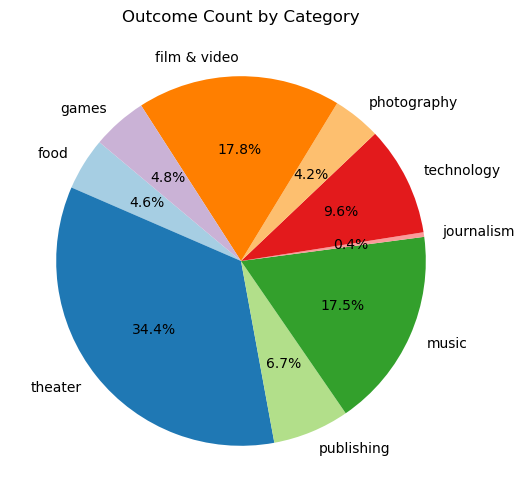

In [29]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_outcome_count_df['outcome_count'], 
        labels=category_outcome_count_df['category'], 
        autopct='%1.1f%%',  # Display percentage on the chart
        startangle=140,  # Start angle for the pie chart
        colors=plt.cm.Paired.colors)  # Custom colors (optional)

# Title for the pie chart
plt.title('Outcome Count by Category')

# Display the chart
plt.show()


In [31]:
query = text("""SELECT 
                    scat.subcategory,
                    COUNT(CASE WHEN c.outcome = 'successful' THEN 1 END) AS successful_count,
                    COUNT(CASE WHEN c.outcome = 'failed' THEN 1 END) AS failed_count
                FROM 
                    campaign c
                INNER JOIN 
                    subcategory scat ON c.subcategory_id = scat.subcategory_id
                GROUP BY 
                    scat.subcategory;""")
subcategory_outcome_count_df = pd.read_sql(query, con=conn)
subcategory_outcome_count_df

,subcategory,successful_count,failed_count
0,animation,21,10
1,electric music,10,8
2,food trucks,22,20
3,fiction,9,7
4,wearables,28,16
5,rock,49,30
6,science fiction,5,9
7,drama,22,12
8,television,11,3
9,translations,14,7


In [49]:
query = text("""SELECT 
                    scat.subcategory, 
                    COUNT(CASE WHEN c.outcome = 'successful' THEN 1 END) AS successful_count
                FROM 
                    campaign c
                INNER JOIN 
                    subcategory scat ON c.subcategory_id = scat.subcategory_id
                GROUP BY 
                    scat.subcategory
                ORDER BY
                	successful_count DESC;
            """)
successful_count_df = pd.read_sql(query, con=conn)
successful_count_df

,subcategory,successful_count
0,plays,187
1,rock,49
2,web,36
3,documentary,34
4,wearables,28
5,photography books,26
6,indie rock,23
7,food trucks,22
8,drama,22
9,animation,21


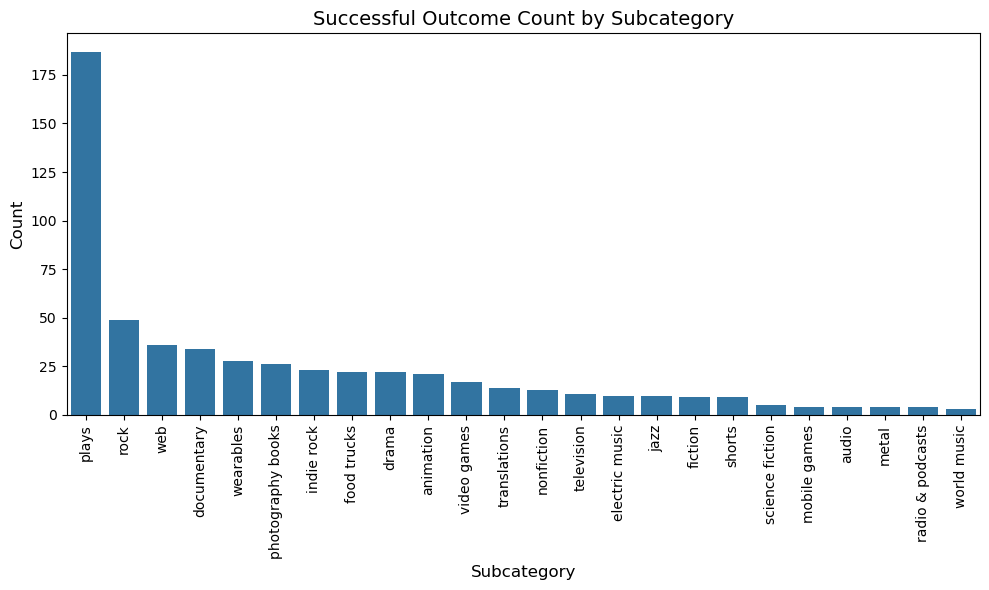

In [53]:
# Create the plot
plt.figure(figsize=(10, 6))

# Use seaborn to create a barplot
sns.barplot(x='subcategory', y='successful_count', data=successful_count_df)

# Adding the labels and title
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Successful Outcome Count by Subcategory', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Layout adjustment for better visibility
plt.tight_layout()

# Show the plot
plt.show()


In [55]:
query = text("""SELECT 
                    scat.subcategory, 
                    COUNT(CASE WHEN c.outcome = 'failed' THEN 1 END) AS failed_count
                FROM 
                    campaign c
                INNER JOIN 
                    subcategory scat ON c.subcategory_id = scat.subcategory_id
                GROUP BY 
                    scat.subcategory
                ORDER BY
                	failed_count DESC;
            """)
failed_count_df = pd.read_sql(query, con=conn)
failed_count_df

,subcategory,failed_count
0,plays,132
1,rock,30
2,documentary,21
3,food trucks,20
4,indie rock,19
5,wearables,16
6,video games,15
7,drama,12
8,web,12
9,photography books,11


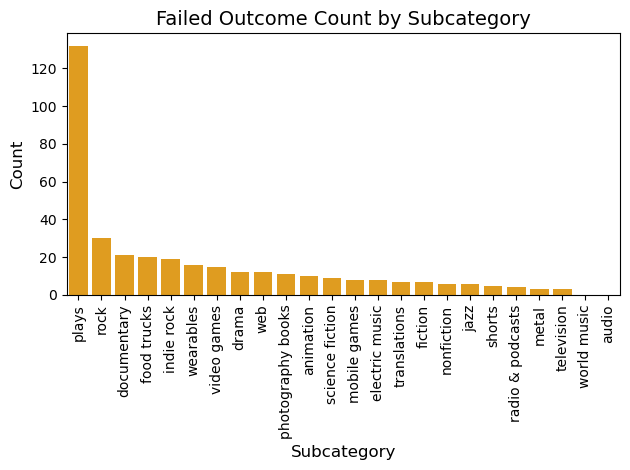

In [57]:
# Use seaborn to create a barplot
sns.barplot(x='subcategory', y='failed_count', data=failed_count_df, color = 'orange')

# Adding the labels and title
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Failed Outcome Count by Subcategory', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Layout adjustment for better visibility
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
query = text("""SELECT 
                    scat.subcategory, 
                    SUM(c.backers_count) AS total_backers
                FROM 
                    campaign c
                INNER JOIN 
                    subcategory scat ON c.subcategory_id = scat.subcategory_id
                GROUP BY 
                    scat.subcategory
                ORDER BY 
                    total_backers DESC;
                """)
df = pd.read_sql(query, con=conn)
df

,subcategory,total_backers
0,plays,264269
1,rock,61241
2,documentary,42897
3,web,41058
4,indie rock,32875
5,animation,29158
6,food trucks,28846
7,wearables,26436
8,photography books,24044
9,video games,23431


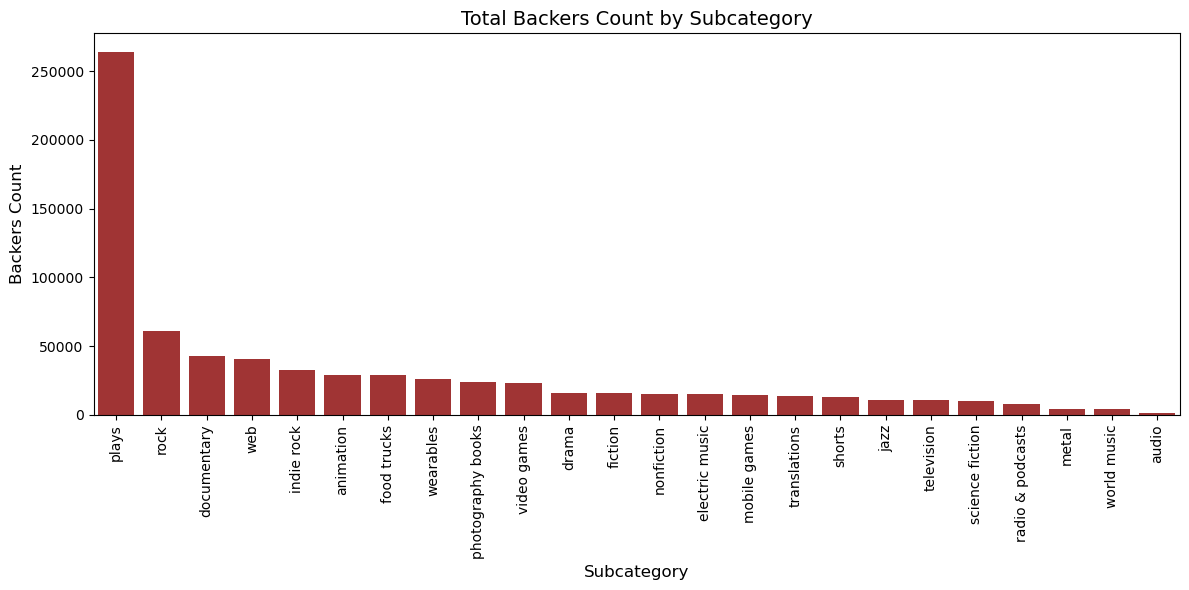

In [45]:
# Create the plot
plt.figure(figsize=(12, 6))

# Create a barplot using seaborn
sns.barplot(x='subcategory', y='total_backers', data=df, color='Firebrick')

# Adding labels and title
plt.xlabel('Subcategory', fontsize=12)
plt.ylabel('Backers Count', fontsize=12)
plt.title('Total Backers Count by Subcategory', fontsize=14)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Layout adjustment for better visibility
plt.tight_layout()

# Show the plot
plt.show()
